<a href="https://colab.research.google.com/github/adnanfathoni88/Big-Data/blob/main/Salinan_dari_8_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Adnan Fathoni <br>
NIM : 24.21.1591 <br>
Kelas : IF08

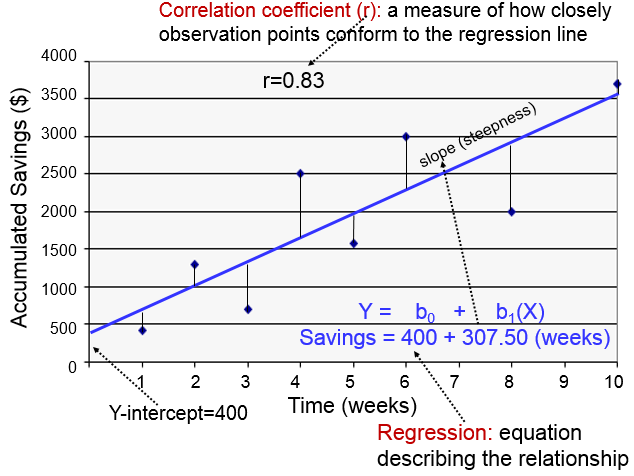

In [1]:
!pip install pyspark

In [2]:
# spark.stop()
# creating Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
spark = SparkSession.builder\
        .master("local")\
        .appName("RDD")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

spark
sc = spark.sparkContext

In [5]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = spark.read.format("libsvm")\
    .load("sample_dataset_lr.txt")

In [6]:
training.show()

+-------------------+--------------------+
|              label|            features|
+-------------------+--------------------+
| -9.490009878824548|(10,[0,1,2,3,4,5,...|
| 0.2577820163584905|(10,[0,1,2,3,4,5,...|
| -4.438869807456516|(10,[0,1,2,3,4,5,...|
|-19.782762789614537|(10,[0,1,2,3,4,5,...|
| -7.966593841555266|(10,[0,1,2,3,4,5,...|
| -7.896274316726144|(10,[0,1,2,3,4,5,...|
| -8.464803554195287|(10,[0,1,2,3,4,5,...|
| 2.1214592666251364|(10,[0,1,2,3,4,5,...|
| 1.0720117616524107|(10,[0,1,2,3,4,5,...|
|-13.772441561702871|(10,[0,1,2,3,4,5,...|
| -5.082010756207233|(10,[0,1,2,3,4,5,...|
|  7.887786536531237|(10,[0,1,2,3,4,5,...|
| 14.323146365332388|(10,[0,1,2,3,4,5,...|
|-20.057482615789212|(10,[0,1,2,3,4,5,...|
|-0.8995693247765151|(10,[0,1,2,3,4,5,...|
| -19.16829262296376|(10,[0,1,2,3,4,5,...|
|  5.601801561245534|(10,[0,1,2,3,4,5,...|
|-3.2256352187273354|(10,[0,1,2,3,4,5,...|
| 1.5299675726687754|(10,[0,1,2,3,4,5,...|
| -0.250102447941961|(10,[0,1,2,3,4,5,...|
+----------

In [7]:
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
# Fit the model
lrModel = lr.fit(training)

In [8]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356


In [9]:
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


In [10]:
from pyspark.ml.linalg import Vectors
df = spark.createDataFrame([
    (1.0, 2.0, Vectors.dense(1.0)),
    (0.0, 2.0, Vectors.sparse(1, [], []))], ["label", "weight", "features"])

In [11]:
df.printSchema()

root
 |-- label: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- features: vector (nullable = true)



In [12]:
df.show()

+-----+------+---------+
|label|weight| features|
+-----+------+---------+
|  1.0|   2.0|    [1.0]|
|  0.0|   2.0|(1,[],[])|
+-----+------+---------+



In [13]:
lr = LinearRegression(regParam=0.1, solver="normal", weightCol="weight")
lr.setMaxIter(5)

LinearRegression_261425e0fc76

In [14]:
lr.getMaxIter()

5

In [15]:
lr.getRegParam()

0.1

In [16]:
model = lr.fit(df)

In [17]:
model.setFeaturesCol("features")
model.setPredictionCol("newPrediction")

LinearRegressionModel: uid=LinearRegression_261425e0fc76, numFeatures=1

In [18]:
test0 = spark.createDataFrame([(Vectors.dense(-1.0),)], ["features"])

In [19]:
test0.show()

+--------+
|features|
+--------+
|  [-1.0]|
+--------+



In [21]:
model.intercept

0.08333333333333345

In [20]:
model.coefficients[0]

0.8333333333333333

In [22]:
model.predict(test0.head().features)

-0.7499999999999998

In [23]:
test1 = spark.createDataFrame([(Vectors.sparse(1, [0], [1.0]),)], ["features"])

In [24]:
model.transform(test1).head().newPrediction

0.9166666666666667

In [25]:
# prompt: Coba untuk mengecilkan error dari nilai RMSE pada model linear regression

from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

# spark.stop()
# creating Spark session
spark = SparkSession.builder.getOrCreate()
# spark = SparkSession.builder\
#         .master("local")\
#         .appName("RDD")\
#         .config('spark.ui.port', '4050')\
#         .getOrCreate()

# Load training data
training = spark.read.format("libsvm")\
    .load("sample_dataset_lr.txt")

# Split the data into training and test sets (important for proper evaluation)
train_data, test_data = training.randomSplit([0.8, 0.2], seed=123)


# Define the Linear Regression model
lr = LinearRegression()

# Create a ParamGrid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01, 0.001]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .addGrid(lr.maxIter, [10, 50, 100]) \
    .build()

# Define an evaluator for the model
evaluator = RegressionEvaluator(metricName="rmse")

# Use TrainValidationSplit for hyperparameter tuning
tvs = TrainValidationSplit(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          trainRatio=0.8) # 80% for training, 20% for validation

# Fit the model with hyperparameter tuning
model = tvs.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model on the test data
rmse = evaluator.evaluate(predictions)
print(f"RMSE on test data = {rmse}")

# Print the best model parameters
print(f"Best model parameters: {model.bestModel.extractParamMap()}")

#Show predictions
predictions.select("prediction", "label", "features").show()

RMSE on test data = 11.065074667196868
Best model parameters: {Param(parent='LinearRegression_864104e97ca6', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LinearRegression_864104e97ca6', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LinearRegression_864104e97ca6', name='epsilon', doc='The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber'): 1.35, Param(parent='LinearRegression_864104e97ca6', name='featuresCol', doc='features column name.'): 'features', Param(parent='LinearRegression_864104e97ca6', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LinearRegression_864104e97ca6', name='labelCol', doc='label column name.'): 'label', Param(parent='LinearRegression_864104e97ca6', name='loss', doc='The loss function to be optimized. 